In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


## ANALÍSIS GENERAL ##

In [3]:
d = pd.read_csv("../data-pruebaspro/train.csv") #Cargado directamente desde archivos del pc, que está en una carpeta hermana
d

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


In [4]:
d.columns #Ver columnas

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')

In [5]:
d.shape #Dimensión

(692500, 21)

In [6]:
d.dtypes  #Tipos de datos en las columnas

ID                                  int64
PERIODO                             int64
ESTU_PRGM_ACADEMICO                object
ESTU_PRGM_DEPARTAMENTO             object
ESTU_VALORMATRICULAUNIVERSIDAD     object
ESTU_HORASSEMANATRABAJA            object
FAMI_ESTRATOVIVIENDA               object
FAMI_TIENEINTERNET                 object
FAMI_EDUCACIONPADRE                object
FAMI_TIENELAVADORA                 object
FAMI_TIENEAUTOMOVIL                object
ESTU_PRIVADO_LIBERTAD              object
ESTU_PAGOMATRICULAPROPIO           object
FAMI_TIENECOMPUTADOR               object
FAMI_TIENEINTERNET.1               object
FAMI_EDUCACIONMADRE                object
RENDIMIENTO_GLOBAL                 object
coef_1                            float64
coef_2                            float64
coef_3                            float64
coef_4                            float64
dtype: object

In [7]:
d.head(10) #Primeros 10 datos

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,Más de 7 millones,Menos de 10 horas,Estrato 5,Si,Educación profesional completa,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,medio-alto,0.553,0.142,0.248,0.175
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional incompleta,Si,...,N,Si,Si,Si,Técnica o tecnológica completa,alto,0.242,0.299,0.267,0.308
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Primaria incompleta,Si,...,N,Si,No,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.238,0.316,0.286,0.290
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Educación profesional incompleta,medio-bajo,0.147,0.407,0.212,0.328
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Si,Postgrado,Si,...,N,Si,Si,Si,Postgrado,alto,0.535,0.122,0.257,0.167


In [8]:
d.tail(10) #Últimos 10 datos

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
692490,403947,20195,PSICOLOGIA,BOLIVAR,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.236,0.304,0.268,0.305
692491,157529,20212,LICENCIATURA EN EDUCACION PREESCOLAR,BOYACA,No pagó matrícula,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional completa,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,medio-alto,0.224,0.292,0.273,0.320
692492,584597,20183,LICENCIATURA EN LENGUA CASTELLANA Y LITERATURA,NARIÑO,Menos de 500 mil,Menos de 10 horas,Estrato 1,Si,Primaria incompleta,No,...,N,Si,Si,Si,Primaria incompleta,alto,0.163,0.400,0.254,0.294
692493,725949,20203,DERECHO,CORDOBA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Educación profesional incompleta,Si,...,N,No,No,Si,Educación profesional completa,medio-alto,0.173,0.410,0.212,0.328
692494,649690,20212,LICENCIATURA EN EDUCACION BASICA CON ENFASIS E...,NORTE SANTANDER,Menos de 500 mil,Entre 21 y 30 horas,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) completa,bajo,0.312,0.209,0.290,0.265
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328
692499,933374,20195,PSICOLOGIA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Más de 30 horas,Estrato 4,Si,Secundaria (Bachillerato) completa,Si,...,N,No,Si,Si,Técnica o tecnológica completa,alto,0.487,0.180,0.251,0.187


In [9]:
d.describe() #Estadísticas descripticas de columnas numéricas

,ID,PERIODO,coef_1,coef_2,coef_3,coef_4
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,494606.130576,20198.366679,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,0.314000,0.309000,0.293000,0.303000
max,989286.000000,20213.000000,0.657000,0.487000,0.320000,0.332000


In [10]:
d.isna().sum() #Conteno de valores nulos por columna

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
coef_1                                0
coef_2                                0
coef_3                                0
coef_4                                0
dtype: int64

In [11]:
numeric_data = d._get_numeric_data()
numeric_data

,ID,PERIODO,coef_1,coef_2,coef_3,coef_4
0,904256,20212,0.322,0.208,0.310,0.267
1,645256,20212,0.311,0.215,0.292,0.264
2,308367,20203,0.297,0.214,0.305,0.264
3,470353,20195,0.485,0.172,0.252,0.190
4,989032,20212,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...
692495,25096,20195,0.237,0.271,0.271,0.311
692496,754213,20212,0.314,0.240,0.278,0.260
692497,504185,20183,0.286,0.240,0.314,0.287
692498,986620,20195,0.132,0.426,0.261,0.328


In [12]:
categorical_col =  [i for i in d.columns if not i in numeric_data]
categorical_col

['ESTU_PRGM_ACADEMICO',
 'ESTU_PRGM_DEPARTAMENTO',
 'ESTU_VALORMATRICULAUNIVERSIDAD',
 'ESTU_HORASSEMANATRABAJA',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_TIENEINTERNET',
 'FAMI_EDUCACIONPADRE',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENEAUTOMOVIL',
 'ESTU_PRIVADO_LIBERTAD',
 'ESTU_PAGOMATRICULAPROPIO',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENEINTERNET.1',
 'FAMI_EDUCACIONMADRE',
 'RENDIMIENTO_GLOBAL']

In [13]:
import numpy as np
dic = {}  
for col in categorical_col:
    dic[col] = list((np.unique(d[col].dropna()))) #CONOCER VALORES UNICOS DE COLS CATEGORICAS MEDIANTE SU NOMBRE


In [14]:
print(dic['FAMI_TIENEINTERNET'])

['No', 'Si']


In [14]:

for i in categorical_col:
    print(i , d[i].value_counts())

ESTU_PRGM_ACADEMICO ESTU_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64
ESTU_PRGM_DEPARTAMENTO ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR        

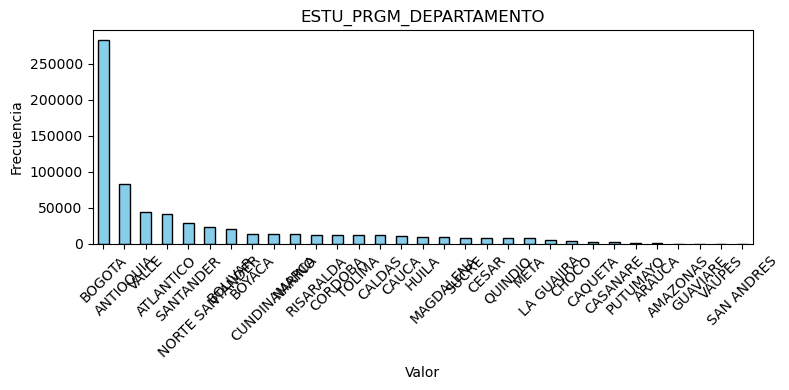

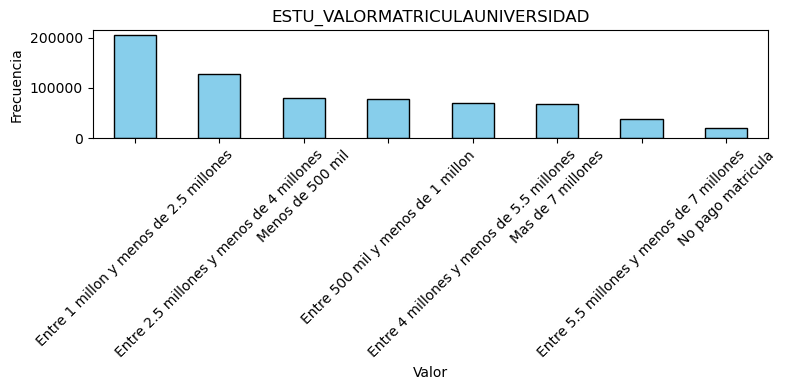

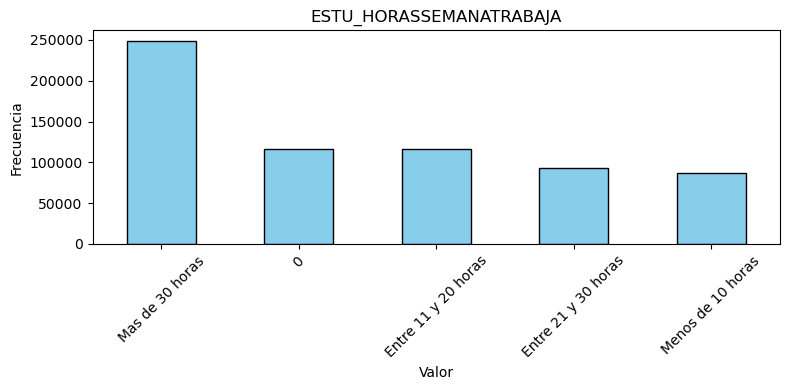

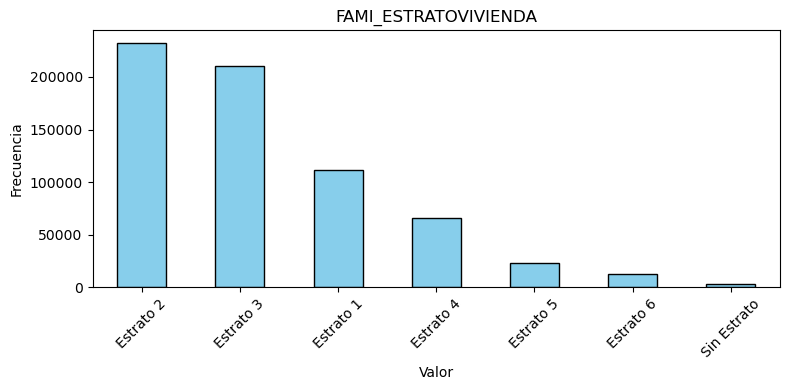

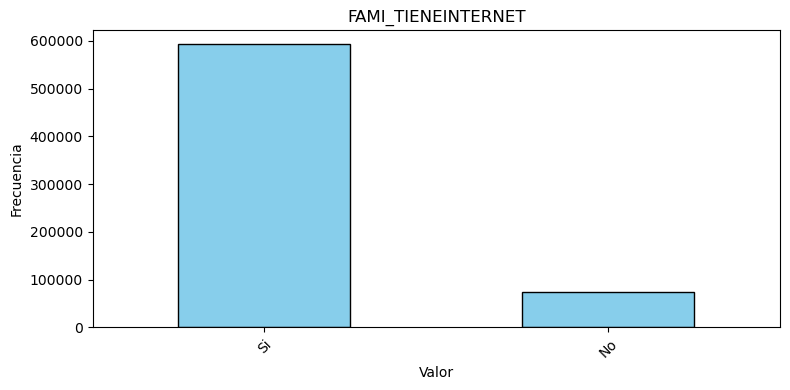

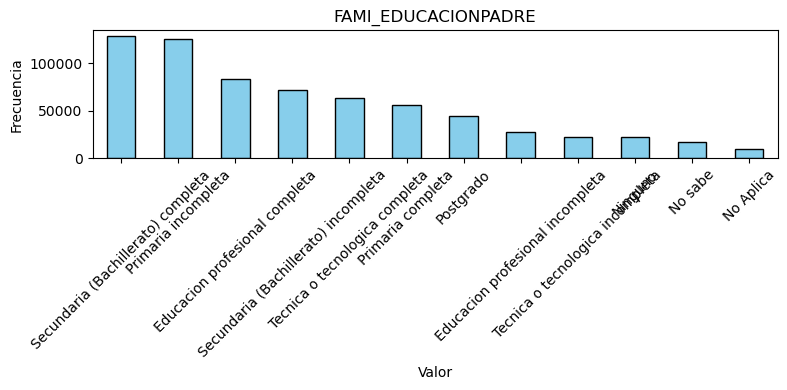

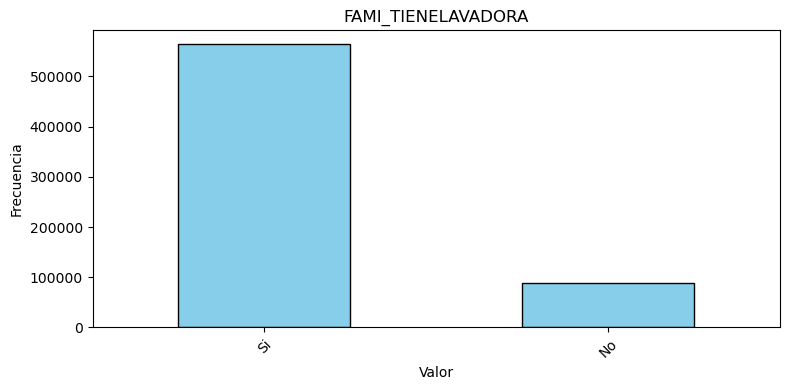

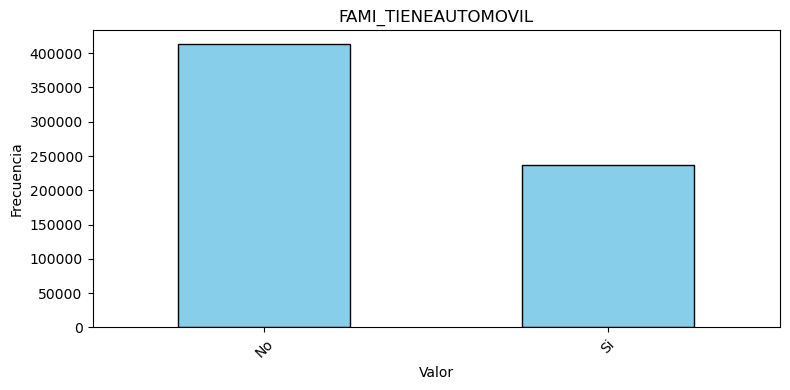

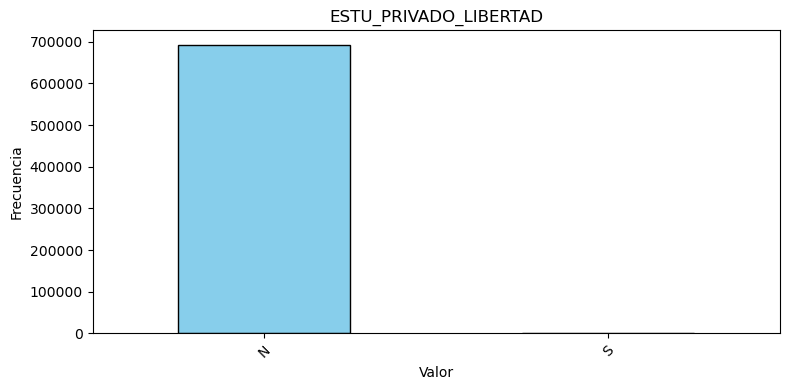

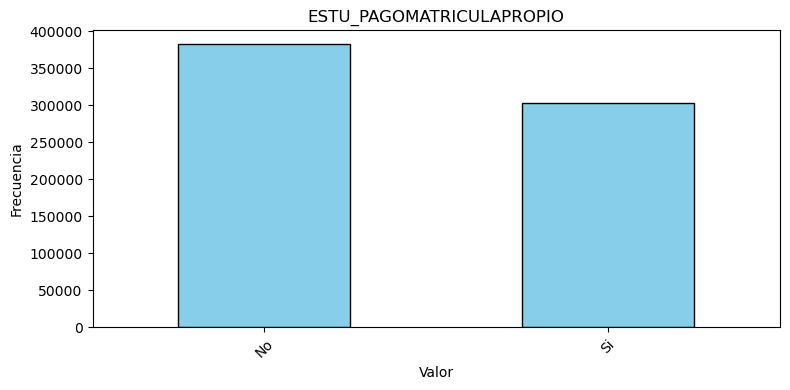

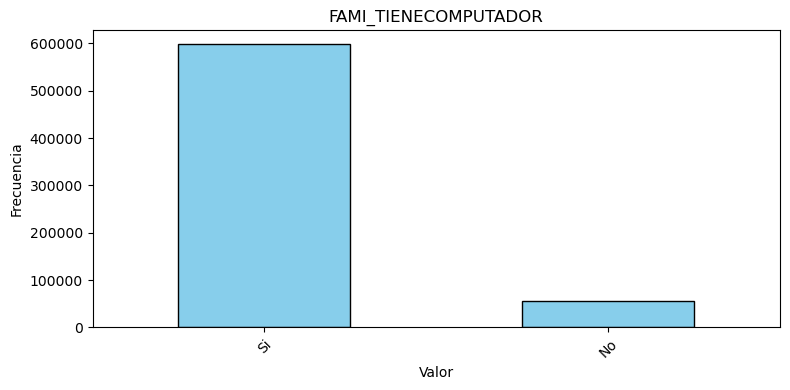

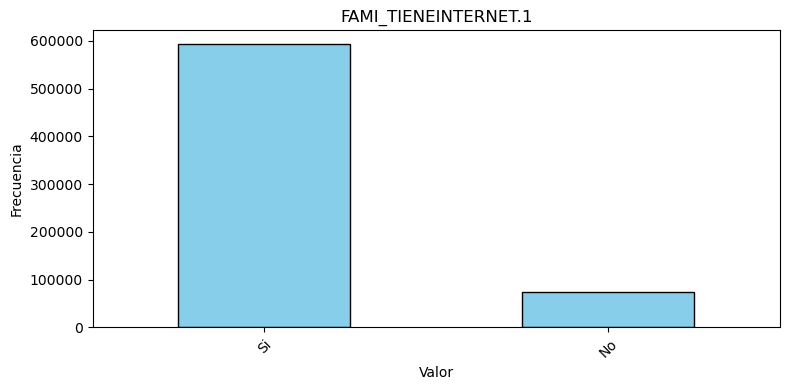

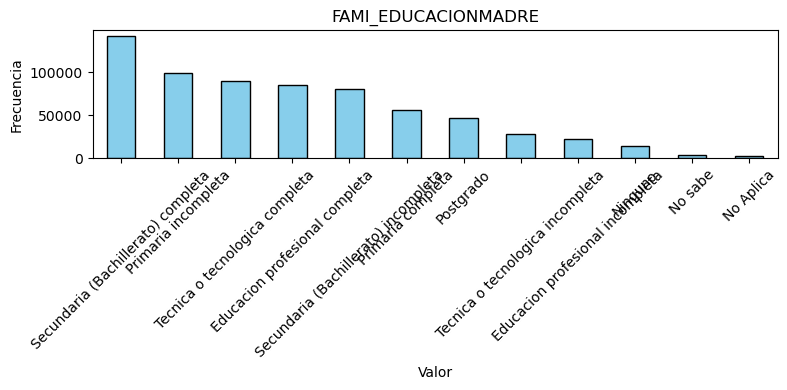

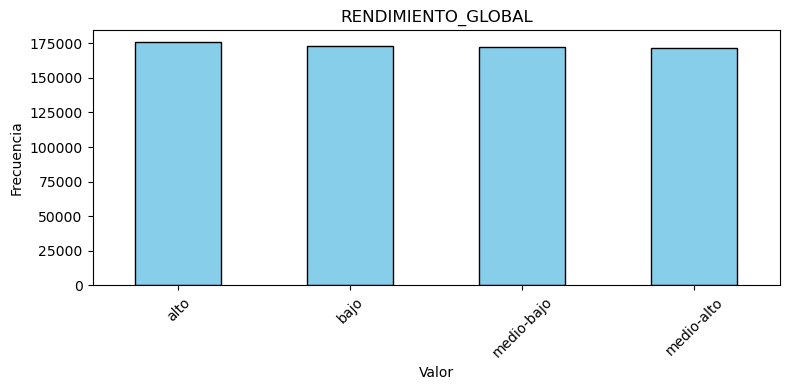

In [32]:
for col in categorical_col[1:]:
    valores = d[col].dropna() 
    conteo = valores.value_counts() 

    plt.figure(figsize=(8, 4))
    conteo.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [16]:
d

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


In [37]:
a=5.5+0.750
a

6.25

In [ ]:
d["ESTU_VALORMATRICULAUNIVERSIDAD"].unique() 

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Mas de 7 millones',
       'Entre 1 millon y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millon', 'Menos de 500 mil',
       'No pago matricula', nan], dtype=object)

In [29]:
d.isna().sum()

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
coef_1                                0
coef_2                                0
coef_3                                0
coef_4                                0
dtype: int64

In [30]:
d

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTA,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Tecnica o tecnologica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Tecnica o tecnologica completa,Si,...,N,No,Si,No,Tecnica o tecnologica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTA,Entre 2.5 millones y menos de 4 millones,Mas de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millon,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Mas de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACION EN SALUD OCUPACIONAL,BOGOTA,Entre 1 millon y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


In [31]:
d["PERIODO"].unique()

array([20212, 20203, 20195, 20183, 20194, 20213, 20184, 20202, 20196])

In [28]:
d["FAMI_EDUCACIONMADRE"].unique()

array(['Postgrado', 'Tecnica o tecnologica incompleta',
       'Secundaria (Bachillerato) completa', 'Primaria completa',
       'Tecnica o tecnologica completa',
       'Secundaria (Bachillerato) incompleta',
       'Educacion profesional incompleta',
       'Educacion profesional completa', 'Primaria incompleta', nan,
       'Ninguno', 'No Aplica', 'No sabe'], dtype=object)

In [19]:
import unicodedata

# Función para quitar tildes
def quitar_tildes(texto):
    if isinstance(texto, str):
        texto = unicodedata.normalize('NFD', texto)
        texto = ''.join([c for c in texto if unicodedata.category(c) != 'Mn'])
    return texto



In [26]:
d[categorical_col] = d[categorical_col].applymap(quitar_tildes)


/tmp/ipykernel_17433/1093102503.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  d[categorical_col] = d[categorical_col].applymap(quitar_tildes)


In [47]:
d['ESTU_HORASSEMANATRABAJA'].unique()

array(['Menos de 10 horas', '0', 'Mas de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas', nan], dtype=object)

*Columnas de rangos en un valor*

ESTU_VALORMATRICULAUNIVERSIDAD -> paso de rangos a la mitad del rango

ESTU_HORASSEMANATRABAJA -> paso de rangos a la mitad del rango

FAMI_ESTRATOVIVIENDA -> Valor numerico (Estrato 1 = 1)

In [ ]:
rango_ingresos = {
    'Menos de 500 mil': 0.25,  # millones
    'Entre 500 mil y menos de 1 millon': 0.75,
    'Entre 1 millon y menos de 2.5 millones': 1.75,
    'Entre 2.5 millones y menos de 4 millones': 3.25,
    'Entre 4 millones y menos de 5.5 millones': 4.75,
    'Entre 5.5 millones y menos de 7 millones': 6.25,
    'Mas de 7 millones': 8.0,  # puedes estimar un valor promedio superior
    'No pago matricula': 0.0,  # si lo interpretas como costo cero
}
d['ESTU_VALORMATRICULAUNIVERSIDAD'] = d['ESTU_VALORMATRICULAUNIVERSIDAD'].map(rango_ingresos)


In [50]:
rango_horas = {
    '0': 0,
    'Menos de 10 horas': 5,
    'Entre 11 y 20 horas': 15.5,
    'Entre 21 y 30 horas': 25.5,
    'Mas de 30 horas': 35,  # posibilidad de ajuste
}
d['ESTU_HORASSEMANATRABAJA'] = d['ESTU_HORASSEMANATRABAJA'].map(rango_horas)


In [ ]:
estrato_map = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': 0  # o puedes usar -1 o np.nan si prefieres distinguirlo
}
d['FAMI_ESTRATOVIVIENDA'] = d['FAMI_ESTRATOVIVIENDA'].map(estrato_map)


In [58]:
d

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTA,6.25,5.0,3.0,Si,Tecnica o tecnologica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,3.25,0.0,3.0,No,Tecnica o tecnologica completa,Si,...,N,No,Si,No,Tecnica o tecnologica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTA,3.25,35.0,3.0,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0.0,4.0,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,25.5,3.0,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,0.75,15.5,2.0,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,3.25,35.0,3.0,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACION EN SALUD OCUPACIONAL,BOGOTA,1.75,5.0,3.0,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,3.25,5.0,1.0,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


In [59]:
d['FAMI_EDUCACIONPADRE'].unique()

array(['Tecnica o tecnologica incompleta',
       'Tecnica o tecnologica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educacion profesional completa',
       'Educacion profesional incompleta', 'Primaria incompleta',
       'Postgrado', nan, 'Secundaria (Bachillerato) incompleta',
       'Ninguno', 'No Aplica'], dtype=object)

In [61]:
nivel_educativo_map = {
    'Ninguno': 0,
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    'Secundaria (Bachillerato) incompleta': 3,
    'Secundaria (Bachillerato) completa': 4,
    'Tecnica o tecnologica incompleta': 5,
    'Tecnica o tecnologica completa': 6,
    'Educacion profesional incompleta': 7,
    'Educacion profesional completa': 8,
    'Postgrado': 9
}

d['FAMI_EDUCACIONMADRE'] = d["FAMI_EDUCACIONMADRE"].map(nivel_educativo_map)

d['FAMI_EDUCACIONMADRE'] = d['FAMI_EDUCACIONMADRE'].replace(['No Aplica', 'No sabe'], np.nan)
d

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTA,6.25,5.0,3.0,Si,Tecnica o tecnologica incompleta,Si,...,N,No,Si,Si,9.0,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,3.25,0.0,3.0,No,Tecnica o tecnologica completa,Si,...,N,No,Si,No,5.0,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTA,3.25,35.0,3.0,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,4.0,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0.0,4.0,Si,No sabe,Si,...,N,No,Si,Si,4.0,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,25.5,3.0,Si,Primaria completa,Si,...,N,No,Si,Si,2.0,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,0.75,15.5,2.0,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,3.0,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,3.25,35.0,3.0,Si,Primaria incompleta,Si,...,N,No,Si,Si,3.0,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACION EN SALUD OCUPACIONAL,BOGOTA,1.75,5.0,3.0,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,3.0,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,3.25,5.0,1.0,No,Primaria completa,No,...,N,Si,Si,No,2.0,bajo,0.132,0.426,0.261,0.328


In [62]:
d['FAMI_EDUCACIONPADRE'] = d["FAMI_EDUCACIONPADRE"].map(nivel_educativo_map)

d['FAMI_EDUCACIONPADRE'] = d['FAMI_EDUCACIONPADRE'].replace(['No Aplica', 'No sabe'], np.nan)
d

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTA,6.25,5.0,3.0,Si,5.0,Si,...,N,No,Si,Si,9.0,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,3.25,0.0,3.0,No,6.0,Si,...,N,No,Si,No,5.0,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTA,3.25,35.0,3.0,Si,4.0,Si,...,N,No,No,Si,4.0,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0.0,4.0,Si,NaN,Si,...,N,No,Si,Si,4.0,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,25.5,3.0,Si,2.0,Si,...,N,No,Si,Si,2.0,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,0.75,15.5,2.0,Si,4.0,Si,...,N,Si,Si,Si,3.0,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,3.25,35.0,3.0,Si,1.0,Si,...,N,No,Si,Si,3.0,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACION EN SALUD OCUPACIONAL,BOGOTA,1.75,5.0,3.0,Si,4.0,Si,...,N,Si,Si,Si,3.0,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,3.25,5.0,1.0,No,2.0,No,...,N,Si,Si,No,2.0,bajo,0.132,0.426,0.261,0.328


In [45]:
d.isna().sum()

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
coef_1                                0
coef_2                                0
coef_3                                0
coef_4                                0
dtype: int64

In [27]:
d["ESTU_PRGM_ACADEMICO"].unique()

array(['ENFERMERIA', 'DERECHO', 'MERCADEO Y PUBLICIDAD',
       'ADMINISTRACION DE EMPRESAS', 'PSICOLOGIA', 'MEDICINA VETERINARIA',
       'INGENIERIA MECANICA', 'ADMINISTRACION EN SALUD OCUPACIONAL',
       'INGENIERIA INDUSTRIAL', 'ADMINISTRACION FINANCIERA',
       'HOTELERIA Y TURISMO', 'LICENCIATURA EN CIENCIAS SOCIALES',
       'LICENCIATURA EN PEDAGOGIA INFANTIL', 'COMUNICACION SOCIAL',
       'CIENCIA POLITICA',
       'PROFESIONAL EN GESTION DE LA SEGURIDAD Y LA SALUD LABORAL',
       'MAESTRO EN MUSICA', 'INGENIERIA MECATRONICA', 'TRABAJO SOCIAL',
       'LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL',
       'INGENIERIA CIVIL', 'CONTADURIA PUBLICA',
       'ADMINISTRACION EN SALUD', 'ESTADISTICA',
       'LICENCIATURA EN BIOLOGIA', 'INGENIERIA AGROINDUSTRIAL',
       'ZOOTECNIA', 'COMUNICACION AUDIOVISUAL',
       'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES-INGLES',
       'COMUNICACION SOCIAL  - PERIODISMO',
       'SEGURIDAD Y SALUD EN EL TRABAJO', 'MEDIC

In [16]:
# f_estrato = d['FAMI_ESTRATOVIVIENDA'].unique()
# program = d['ESTU_PRGM_ACADEMICO'].unique()
# matricula = d['ESTU_VALORMATRICULAUNIVERSIDAD'].unique()
# puntaje = d['RENDIMIENTO_GLOBAL'].unique()
# edu_oadre = d['FAMI_EDUCACIONPADRE'].unique()
# edu_madre = d['FAMI_EDUCACIONMADRE'].unique()
# print(len(edu_oadre))


In [17]:
a=d.groupby('ESTU_PRGM_DEPARTAMENTO')['FAMI_ESTRATOVIVIENDA'].count()
a

ESTU_PRGM_DEPARTAMENTO
AMAZONAS               40
ANTIOQUIA           79556
ARAUCA                567
ATLANTICO           38973
BOGOTÁ             270036
BOLIVAR             19552
BOYACA              13403
CALDAS              11118
CAQUETA              2539
CASANARE             1763
CAUCA               10695
CESAR                7894
CHOCO                3918
CORDOBA             11665
CUNDINAMARCA        13516
GUAVIARE               37
HUILA                9596
LA GUAJIRA           4483
MAGDALENA            9058
META                 7564
NARIÑO              12724
NORTE SANTANDER     21609
PUTUMAYO              746
QUINDIO              7772
RISARALDA           12093
SAN ANDRES              9
SANTANDER           27626
SUCRE                8299
TOLIMA              11445
VALLE               42053
VAUPES                 14
Name: FAMI_ESTRATOVIVIENDA, dtype: int64